<a href="https://colab.research.google.com/github/Bhuvan588/Skin-Disease-Prediction/blob/main/Skin_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Downloading the dataset

In [8]:
!kaggle datasets download -d subirbiswas19/skin-disease-dataset

'kaggle' is not recognized as an internal or external command,
operable program or batch file.


In [9]:
from zipfile import ZipFile

with ZipFile("skin-disease-dataset.zip", "r") as zip_ref:
  zip_ref.extractall()

Checking no of images

In [13]:
import os
train_dir  ="skin-disease-datasaet/train_set"
total_train_images  =0

for category in os.listdir(train_dir):
    category_dir = os.path.join(train_dir, category)
    num_images = len(os.listdir(category_dir))
    total_train_images += num_images

print("Total no of training images: ", total_train_images)

Total no of training images:  925


In [15]:
test_dir = "skin-disease-datasaet/test_set"
total_test_images  =0

for category in os.listdir(test_dir):
  category_dir = os.path.join(test_dir , category)
  num_images = len(os.listdir(category_dir))
  total_test_images += num_images

print("Total no of test images: ", total_test_images)

Total no of test images:  234


Seeing some sample images

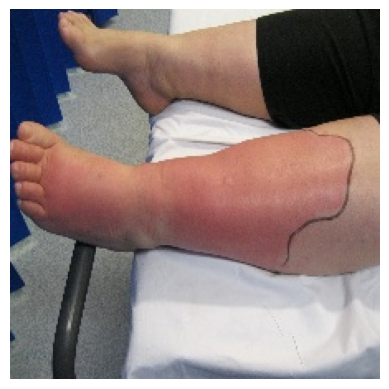

In [17]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img_dir = "skin-disease-datasaet/train_set/BA- cellulitis/BA- cellulitis (1).jpeg"
img = mpimg.imread(img_dir)
plt.imshow(img)
plt.axis("off")
plt.show()

In [18]:
print(img.shape)

(224, 224, 3)


Using Data Generators  - Helping in Data Augmentation

In [20]:
#DEFINING THE DATA GENERATOR
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_gen = ImageDataGenerator(
    rescale = 1./255,
)

In [22]:
#Defining the training set data generator

train_dir  ="skin-disease-datasaet/train_set"

train_generator = data_gen.flow_from_directory(
    train_dir,
    target_size =(150, 150),
    class_mode="categorical",
    batch_size = 32
)

Found 924 images belonging to 8 classes.


In [23]:
#Defining the test set generator

test_dir = "skin-disease-datasaet/test_set"

test_generator = data_gen.flow_from_directory(
    test_dir,
    target_size = (150,150),
    class_mode="categorical",
    batch_size = 32
)

Found 233 images belonging to 8 classes.


Building the CNN

In [25]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [27]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation="relu", input_shape =(150, 150,3), padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation="relu", input_shape =(150, 150,3), padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))



model.add(Conv2D(128, (3,3), activation="relu", input_shape =(150, 150,3), padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation="relu", input_shape =(150, 150,3), padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(512, (3,3), activation="relu", input_shape =(150, 150,3), padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(512, (3,3), activation="relu", input_shape =(150, 150,3), padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.6))
model.add(Dense(128, activation ="relu"))
model.add(Dropout(0.6))
model.add(Dense(8, activation="softmax"))

In [28]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 150, 150, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 75, 75, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 37, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 37, 37, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 18, 18, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 18, 18, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 9, 9, 512)      │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 9, 9, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 4, 4, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        65,66

 Total params: 4,312,264 (16.45 MB)

 Trainable params: 4,309,512 (16.44 MB)

 Non-trainable params: 2,752 (10.75 KB)

Model Compiling

In [29]:
from keras.optimizers import Adam
model.compile(loss="categorical_crossentropy", optimizer ="adam", metrics=["accuracy"])

Model Training

In [30]:
history  = model.fit(train_generator, epochs = 25, batch_size = 15, validation_data = test_generator)

Epoch 1/25


c:\Users\mrabi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


29/29 ━━━━━━━━━━━━━━━━━━━━ 22s 645ms/step - accuracy: 0.1614 - loss: 5.3062 - val_accuracy: 0.0987 - val_loss: 2.1613
Epoch 2/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 18s 631ms/step - accuracy: 0.2278 - loss: 2.7489 - val_accuracy: 0.1416 - val_loss: 2.1194
Epoch 3/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 17s 594ms/step - accuracy: 0.2389 - loss: 2.3346 - val_accuracy: 0.1416 - val_loss: 2.1031
Epoch 4/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 17s 590ms/step - accuracy: 0.2624 - loss: 2.1362 - val_accuracy: 0.1459 - val_loss: 2.2921
Epoch 5/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 18s 614ms/step - accuracy: 0.3507 - loss: 1.8806 - val_accuracy: 0.0987 - val_loss: 2.7210
Epoch 6/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 17s 596ms/step - accuracy: 0.3701 - loss: 1.9317 - val_accuracy: 0.0944 - val_loss: 2.3680
Epoch 7/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 17s 592ms/step - accuracy: 0.4287 - loss: 1.6106 - val_accuracy: 0.0987 - val_loss: 2.4755
Epoch 8/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 17s 591ms/step - accuracy: 0.4069 - loss: 1.6348 - val_accuracy: 0.115

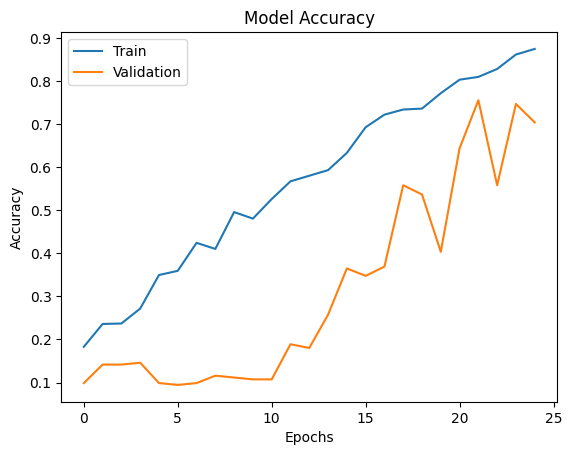

In [31]:
h = history

plt.plot(h.history["accuracy"])
plt.plot(h.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])
plt.show()

In [32]:
model.save("skin_disease_model.keras")